In [167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Вариант 3А

# Import

In [168]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Линейная регрессия

In [169]:
df_lin = pd.read_csv('/content/drive/MyDrive/lab3_lin1.csv')
df_lin.head(5)

,x1,x2,x3,x4,x5,y
0,0.4241,1.2065,-0.0992,1.1363,-0.4517,2.5081
1,1.4999,-1.8712,-0.1863,0.1274,1.6150,69.0924
2,-1.9402,1.0229,0.0152,0.6839,0.5239,48.9160
3,-0.3690,0.2127,-0.5173,1.3148,0.1116,-1.6333
4,1.3925,1.9357,-1.0630,-0.0942,-0.1154,-99.9433


In [170]:
df_lin.isnull().values.any()

False

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
x = df_lin[["x1", "x2", "x3", "x5"]].to_numpy()
y = df_lin["y"].to_numpy()

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = False)

In [174]:
print(x_train.shape)
print(y_train.shape)

(700, 4)
(700,)


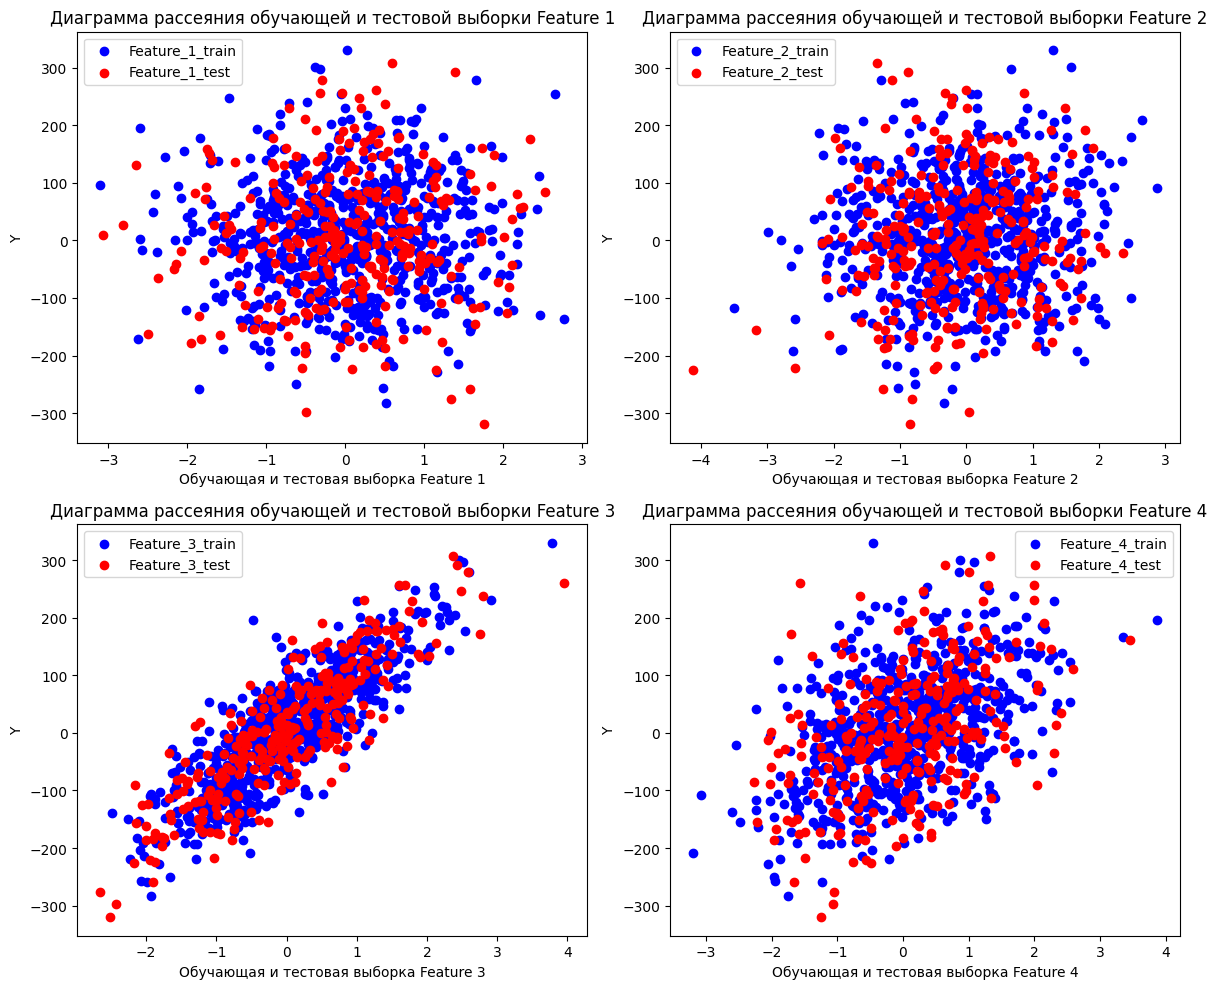

In [175]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.flatten()):
    ax.scatter(x_train[:, i], y_train, label=f'Feature_{i+1}_train', color = 'blue')
    ax.scatter(x_test[:, i], y_test, label=f'Feature_{i+1}_test', color = 'red')
    ax.set_title(f'Диаграмма рассеяния обучающей и тестовой выборки Feature {i+1}')
    ax.set_xlabel(f'Обучающая и тестовая выборка Feature {i+1}')
    ax.set_ylabel('Y')
    ax.legend()

plt.tight_layout()
plt.show()

In [176]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 1.09051103  0.15354934 89.93428583 47.63530072]
3.6409562645010265


In [177]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [178]:
def metrics(model):
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)
  r2_train = r2_score(y_train, y_train_pred)
  mae_train = mean_absolute_error(y_train, y_train_pred)
  mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
  r2_test = r2_score(y_test, y_test_pred)
  mae_test = mean_absolute_error(y_test, y_test_pred)
  mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
  print("обучающая:")
  print("R^2:", r2_train)
  print("MAE:", mae_train)
  print("MAPE:", mape_train)
  print()
  print("тестовая:")
  print("R^2:", r2_test)
  print("MAE:", mae_test)
  print("MAPE:", mape_test)
  return r2_train, mae_train, mape_train, r2_test, mae_test, mape_test

In [179]:
r2_lin_reg_train, mae_lin_reg_train, mape_lin_reg_train, r2_lin_reg_test, mae_lin_reg_test, mape_lin_reg_test = metrics(lin_reg)

обучающая:
R^2: 0.9322865306693603
MAE: 20.82540974662524
MAPE: 2.3183910839503303

тестовая:
R^2: 0.9414085497438694
MAE: 22.380587662042284
MAPE: 1.117974724088372


In [180]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)

print('Коэффициенты регрессии:', lasso_reg.coef_)
print('Свободный член:', lasso_reg.intercept_)
print()

r2_lasso_reg_train, mae_lasso_reg_train, mape_lasso_reg_train, r2_lasso_reg_test, mae_lasso_reg_test, mape_lasso_reg_test = metrics(lasso_reg)

Коэффициенты регрессии: [9.83863406e-01 5.94770071e-02 8.98281789e+01 4.75343929e+01]
Свободный член: 3.648744138480885

обучающая:
R^2: 0.9322824923500974
MAE: 20.819332380002987
MAPE: 2.3192208645369803

тестовая:
R^2: 0.94132722440963
MAE: 22.401857184098233
MAPE: 1.1121859557376224


In [181]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(x_train, y_train)

print('Коэффициенты регрессии:', ridge_reg.coef_)
print('Свободный член:', ridge_reg.intercept_)
print()

r2_ridge_reg_train, mae_ridge_reg_train, mape_ridge_reg_train, r2_ridge_reg_test, mae_ridge_reg_test, mape_ridge_reg_test = metrics(ridge_reg)

Коэффициенты регрессии: [ 1.09049899  0.15432386 89.91975597 47.62838539]
Свободный член: 3.6416481465485013

обучающая:
R^2: 0.9322865075229727
MAE: 20.82538783930057
MAPE: 2.318081332519898

тестовая:
R^2: 0.9414007502797531
MAE: 22.38222042818475
MAPE: 1.117878625727993


In [182]:
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_reg.fit(x_train, y_train)

print('Коэффициенты регрессии:', elastic_reg.coef_)
print('Свободный член:', elastic_reg.intercept_)
print()

r2_elastic_reg_train, mae_elastic_reg_train, mape_elastic_reg_train, r2_elastic_reg_test, mae_elastic_reg_test, mape_elastic_reg_test = metrics(elastic_reg)

Коэффициенты регрессии: [ 1.03282119  0.35296673 85.07062842 45.28371124]
Свободный член: 3.874169132771116

обучающая:
R^2: 0.9296750391612449
MAE: 21.183505615734283
MAPE: 2.2194841189774297

тестовая:
R^2: 0.9362878414280954
MAE: 23.479456974853747
MAPE: 1.0874966262225523


In [183]:
from sklearn.linear_model import SGDRegressor

SGDRegressor_reg = SGDRegressor(penalty='elasticnet', l1_ratio=0.5, learning_rate='adaptive', eta0=0.01, max_iter=1000, tol=1e-3)
SGDRegressor_reg.fit(x_train, y_train)

print('Коэффициенты регрессии:', SGDRegressor_reg.coef_)
print('Свободный член:', SGDRegressor_reg.intercept_)
print()

r2_SGDRegressor_reg_train, mae_SGDRegressor_reg_train, mape_SGDRegressor_reg_train, r2_SGDRegressor_reg_test, mae_SGDRegressor_reg_test, mape_SGDRegressor_reg_test = metrics(SGDRegressor_reg)

Коэффициенты регрессии: [ 1.04222955  0.14540759 89.89581068 47.62478267]
Свободный член: [3.69142249]

обучающая:
R^2: 0.9322859315191699
MAE: 20.824313378420158
MAPE: 2.3207723292590288

тестовая:
R^2: 0.9413953757821487
MAE: 22.385624630151305
MAPE: 1.1170178852987631


In [184]:
methods = ['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet', 'SGDRegressor']

lin_reg_train_metrics = {'R2': [r2_lin_reg_train, r2_lasso_reg_train, r2_ridge_reg_train, r2_elastic_reg_train, r2_SGDRegressor_reg_train],
                         'MAE': [mae_lin_reg_train, mae_lasso_reg_train, mae_ridge_reg_train, mae_elastic_reg_train, mae_SGDRegressor_reg_train],
                         'MAPE': [mape_lin_reg_train, mape_lasso_reg_train, mape_ridge_reg_train, mape_elastic_reg_train, mape_SGDRegressor_reg_train]}
lin_reg_test_metrics = {'R2': [r2_lin_reg_test, r2_lasso_reg_test, r2_ridge_reg_test, r2_elastic_reg_test, r2_SGDRegressor_reg_test],
                         'MAE': [mae_lin_reg_test, mae_lasso_reg_test, mae_ridge_reg_test, mae_elastic_reg_test, mae_SGDRegressor_reg_test],
                         'MAPE': [mape_lin_reg_test, mape_lasso_reg_test, mape_ridge_reg_test, mape_elastic_reg_test, mape_SGDRegressor_reg_test]}

train_df = pd.DataFrame(lin_reg_train_metrics, index=methods)
test_df = pd.DataFrame(lin_reg_test_metrics, index=methods)

summary_table = pd.concat([train_df, test_df], keys=['Train', 'Test'], axis=1)

summary_table

Train                           Test                     
                        R2        MAE      MAPE        R2        MAE      MAPE
LinearRegression  0.932287  20.825410  2.318391  0.941409  22.380588  1.117975
Lasso             0.932282  20.819332  2.319221  0.941327  22.401857  1.112186
Ridge             0.932287  20.825388  2.318081  0.941401  22.382220  1.117879
ElasticNet        0.929675  21.183506  2.219484  0.936288  23.479457  1.087497
SGDRegressor      0.932286  20.824313  2.320772  0.941395  22.385625  1.117018

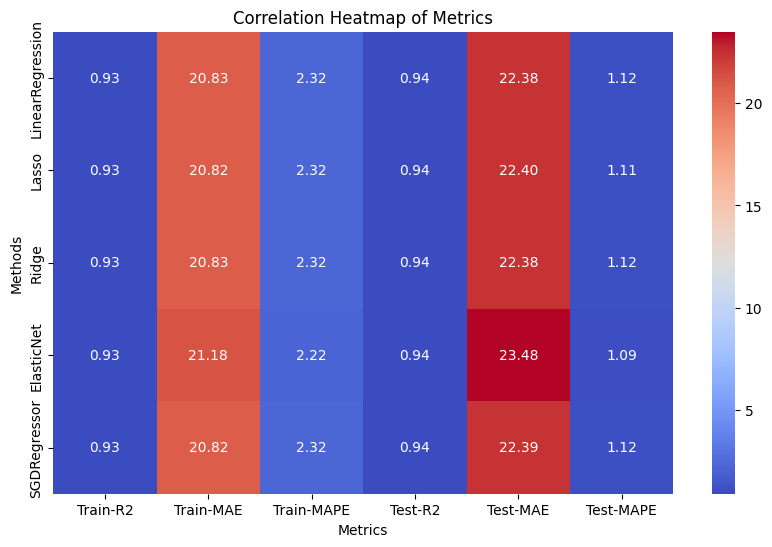

In [185]:
plt.figure(figsize=(10, 6))
sns.heatmap(summary_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Metrics')
plt.xlabel('Metrics')
plt.ylabel('Methods')
plt.show()

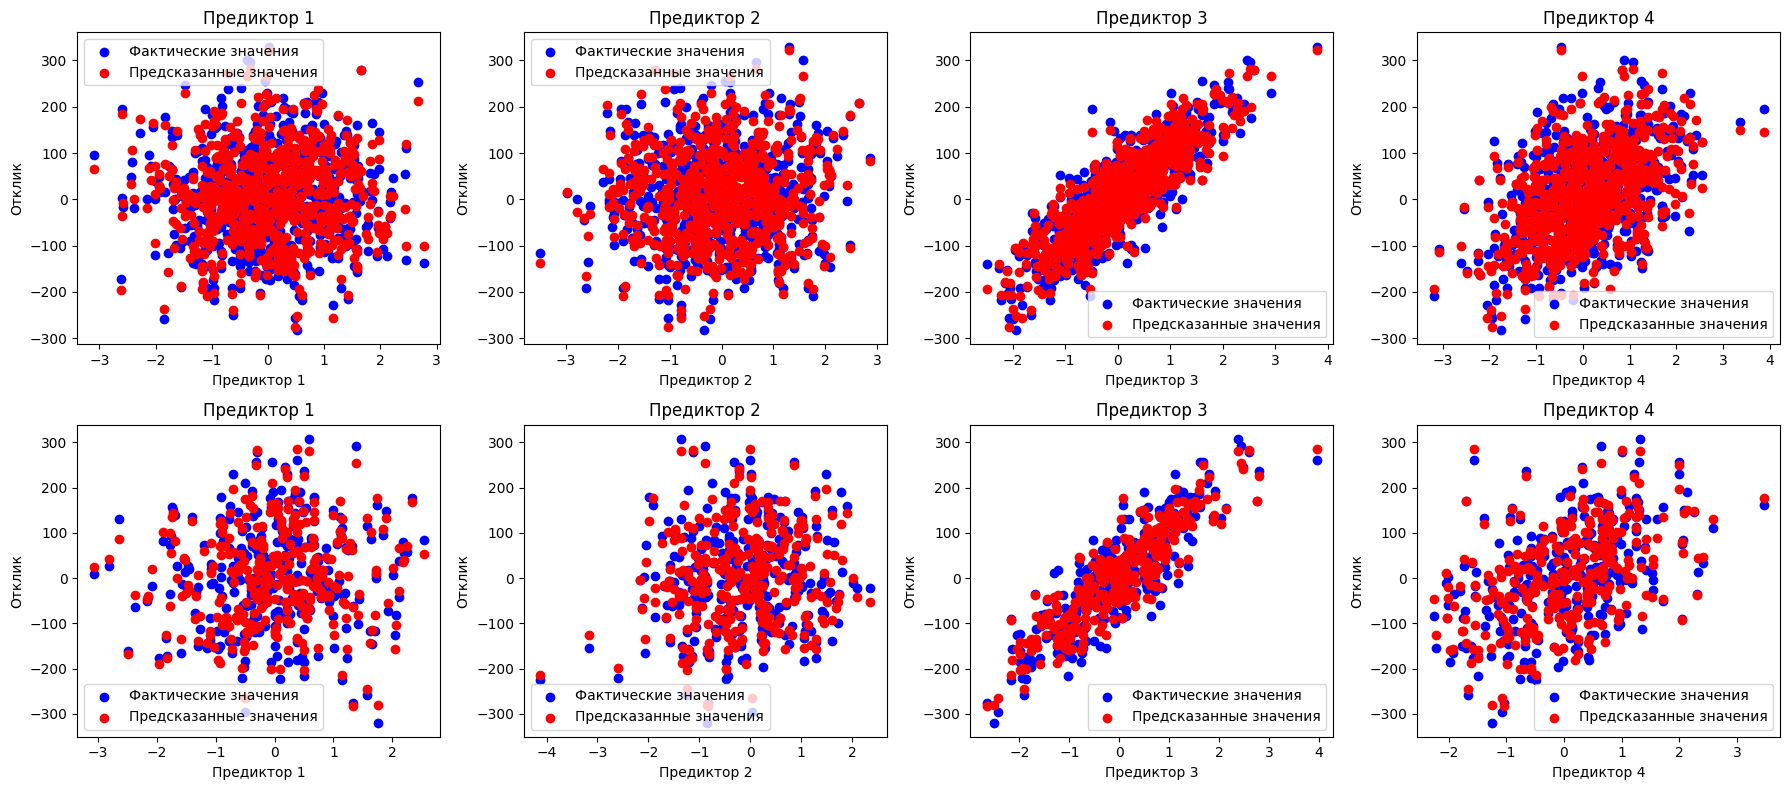

In [186]:
y_pred_train = lin_reg.predict(x_train)
y_pred_test = lin_reg.predict(x_test)
fig, axs = plt.subplots(2, 4, figsize=(18, 8))

for i in range(x_train.shape[1]):
    axs[0, i].scatter(x_train[:, i], y_train, color='blue', label='Фактические значения')
    axs[0, i].scatter(x_train[:, i], y_pred_train, color='red', label='Предсказанные значения')
    axs[0, i].set_xlabel(f'Предиктор {i+1}')
    axs[0, i].set_ylabel('Отклик')
    axs[0, i].set_title(f'Предиктор {i+1}')
    axs[0, i].legend()

for i in range(x_test.shape[1]):
    axs[1, i].scatter(x_test[:, i], y_test, color='blue', label='Фактические значения')
    axs[1, i].scatter(x_test[:, i], y_pred_test, color='red', label='Предсказанные значения')
    axs[1, i].set_xlabel(f'Предиктор {i+1}')
    axs[1, i].set_ylabel('Отклик')
    axs[1, i].set_title(f'Предиктор {i+1}')
    axs[1, i].legend()

plt.tight_layout()
plt.show()

# Нелинейная регрессия



In [187]:
df_poly = pd.read_csv('/content/drive/MyDrive/lab3_poly2.csv')
df_poly.head(5)

,x,y
0,1.2429,0.2452
1,-0.6314,-1.0334
2,0.9256,1.9695
3,0.6894,0.3605
4,-0.1864,-0.1788


In [188]:
df_poly.isnull().values.any()

False

In [189]:
x = df_poly["x"].to_numpy().reshape(-1, 1)
y = df_poly["y"].to_numpy().reshape(-1, 1)

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = False)

In [191]:
print(x_train.shape)
print(y_train.shape)

(350, 1)
(350, 1)


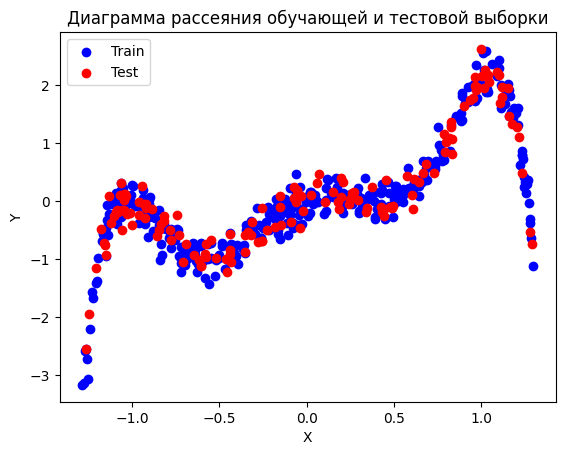

In [192]:
plt.scatter(x_train, y_train, label=f'Train', color = 'blue')
plt.scatter(x_test, y_test, label=f'Test', color = 'red')
plt.title(f'Диаграмма рассеяния обучающей и тестовой выборки')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

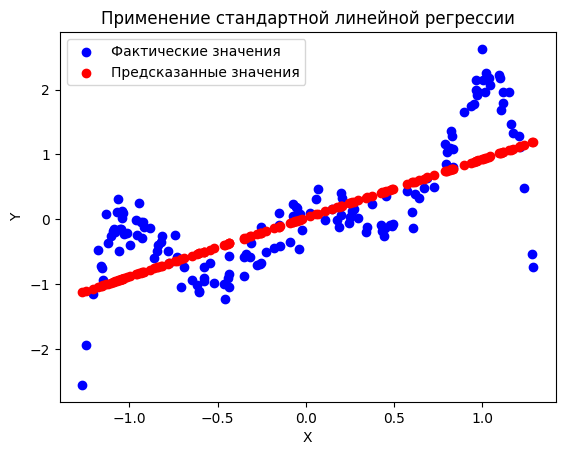

In [193]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_pred_train = lin_reg.predict(x_train)
y_pred_test = lin_reg.predict(x_test)

plt.scatter(x_test, y_test, color='blue', label='Фактические значения')
plt.scatter(x_test, y_pred_test, color='red', label='Предсказанные значения')
plt.title(f'Применение стандартной линейной регрессии')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [194]:
from sklearn.preprocessing import PolynomialFeatures

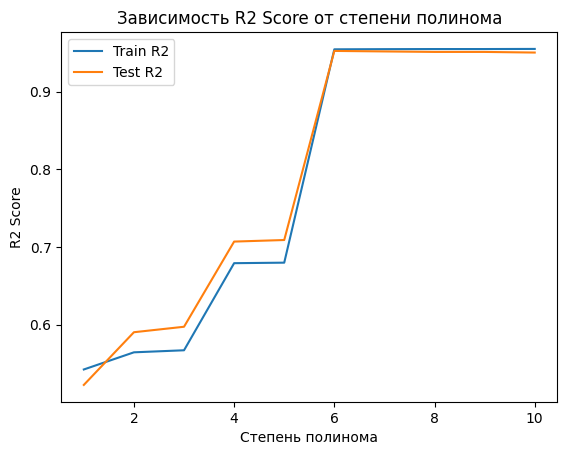

In [195]:
# Создаем списки для сохранения коэффициентов детерминации
train_r2 = []
test_r2 = []

# Перебираем разные степени полинома от 1 до 10
for degree in range(1, 11):
    # Создаем объект PolynomialFeatures для преобразования данных
    poly = PolynomialFeatures(degree)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_test = poly.transform(x_test)

    # Обучаем модель линейной регрессии на обучающей выборке
    model = LinearRegression(fit_intercept = False)
    model.fit(x_poly_train, y_train)

    # Предсказываем значения на обучающей и тестовой выборках
    y_train_pred = model.predict(x_poly_train)
    y_test_pred = model.predict(x_poly_test)

    # Вычисляем коэффициент детерминации и добавляем в списки
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

# Строим график зависимости коэффициента детерминации от степени полинома
plt.plot(range(1, 11), train_r2, label='Train R2')
plt.plot(range(1, 11), test_r2, label='Test R2')
plt.xlabel('Степень полинома')
plt.ylabel('R2 Score')
plt.title('Зависимость R2 Score от степени полинома')
plt.legend()
plt.show()

In [196]:
def poly_metrics(poly, model):
  x_poly_train = poly.fit_transform(x_train)
  x_poly_test = poly.transform(x_test)

  y_train_pred = model.predict(x_poly_train)
  y_test_pred = model.predict(x_poly_test)

  r2_train = r2_score(y_train, y_train_pred)
  mae_train = mean_absolute_error(y_train, y_train_pred)
  mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

  r2_test = r2_score(y_test, y_test_pred)
  mae_test = mean_absolute_error(y_test, y_test_pred)
  mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

  print("Метрики для обучающей выборки:")
  print("R^2:", r2_train)
  print("MAE:", mae_train)
  print("MAPE:", mape_train)
  print()
  print("Метрики для тестовой выборки:")
  print("R^2:", r2_test)
  print("MAE:", mae_test)
  print("MAPE:", mape_test)

  return r2_train, mae_train, mape_train, r2_test, mae_test, mape_test

In [197]:
poly = PolynomialFeatures(6, include_bias = False)
x5_train = poly.fit_transform(x_train)
lin5 = LinearRegression(fit_intercept = True)
lin5.fit(x5_train, y_train)

print('Коэффициенты регрессии:', lin5.coef_)
print('Свободный член:', lin5.intercept_)
print()

r2_lin5_train, mae_lin5_train, mape_lin5_train, r2_lin5_test, mae_lin5_test, mape_lin5_test = poly_metrics(poly, lin5)

Коэффициенты регрессии: [[ 1.00660965 -4.25846968  0.01230578 10.59249166  0.01936263 -5.29303717]]
Свободный член: [0.02889637]

Метрики для обучающей выборки:
R^2: 0.954562295549346
MAE: 0.1553334716839232
MAPE: 1.0608265815790738

Метрики для тестовой выборки:
R^2: 0.9524960976884708
MAE: 0.1652783557205586
MAPE: 0.8286128358039425


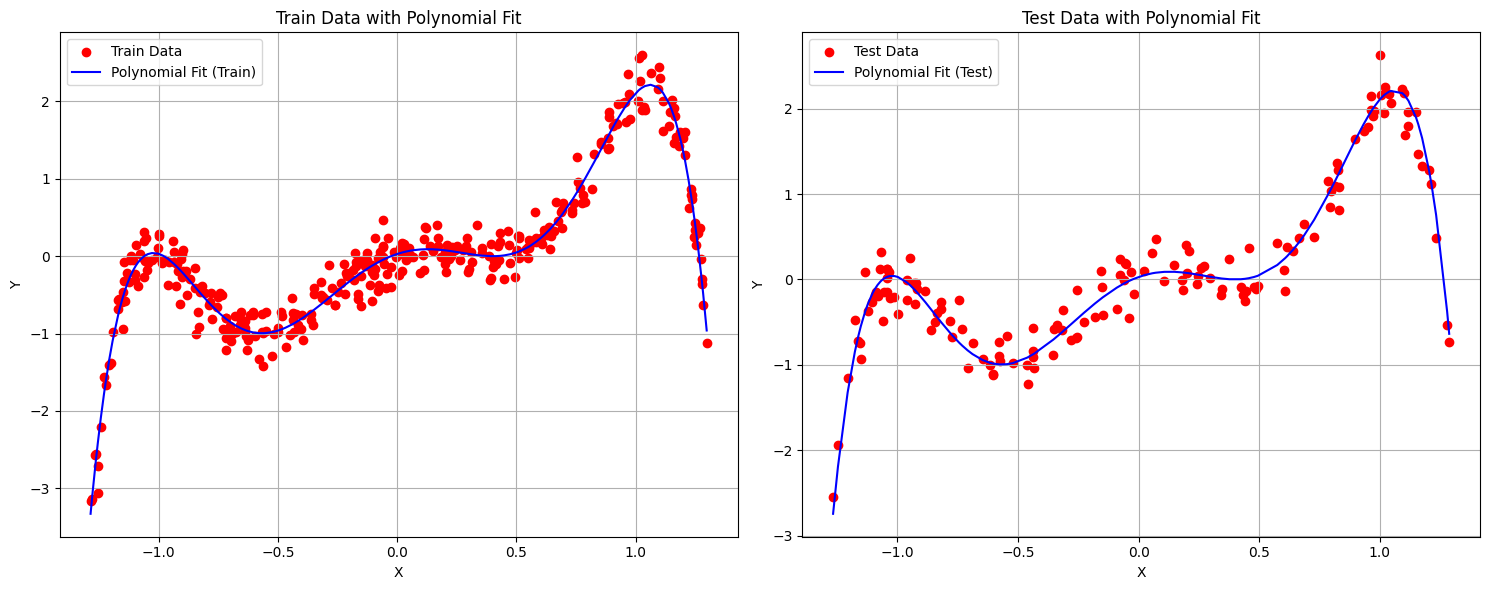

In [198]:
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

y_train_pred = lin5.predict(x_poly_train)
y_test_pred = lin5.predict(x_poly_test)

sort_idx_train = x_poly_train[:, 0].argsort()
sort_idx_test = x_poly_test[:, 0].argsort()

# Создаем новый холст с двумя осями
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Строим диаграмму рассеяния для тренировочной выборки на левой оси
axs[0].scatter(x_train, y_train, color='red', label='Train Data')

# Строим линию полинома для тренировочной выборки на левой оси
axs[0].plot(x_train[sort_idx_train], y_train_pred[sort_idx_train], color='blue', label='Polynomial Fit (Train)')

axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title('Train Data with Polynomial Fit')
axs[0].legend()
axs[0].grid(True)

# Строим диаграмму рассеяния для тестовой выборки на правой оси
axs[1].scatter(x_test, y_test, color='red', label='Test Data')

# Строим линию полинома для тестовой выборки на правой оси
axs[1].plot(x_test[sort_idx_test], y_test_pred[sort_idx_test], color='blue', label='Polynomial Fit (Test)')

axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title('Test Data with Polynomial Fit')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [199]:
import tensorflow as tf

In [200]:
x_tf_train = tf.constant(x_train, dtype = tf.float32)
y_tf_train = tf.constant(y_train, dtype = tf.float32)
x_tf_test = tf.constant(x_test, dtype = tf.float32)
y_tf_test = tf.constant(y_test, dtype = tf.float32)

In [201]:
degree = 6

# Cкорость обучения
alpha = tf.constant(0.001, dtype = tf.float32)

# Количество итераций (эпох)
epoch_n = 5000

# Инициализация весов близкими к нулю значениями
w = [tf.Variable(np.random.randn()) for _ in range(degree+1)]

# Цикл обучения
for epoch in range(epoch_n):
    with tf.GradientTape() as tape:
        y_pred_train = sum([w[i] * x_tf_train ** i for i in range(len(w))])
        loss = tf.reduce_mean(tf.square(y_tf_train - y_pred_train))
    grad = tape.gradient(loss, w)
    for i in range(degree):
        w[i].assign_add(-(alpha * grad[i]))
    if(epoch+1) % 250 == 0:
        print(f"E: {epoch+1}, L: {loss.numpy()}")

E: 250, L: 1.218424916267395
E: 500, L: 0.47997450828552246
E: 750, L: 0.3705519437789917
E: 1000, L: 0.3359604775905609
E: 1250, L: 0.3129298985004425
E: 1500, L: 0.29369693994522095
E: 1750, L: 0.27700620889663696
E: 2000, L: 0.26242682337760925
E: 2250, L: 0.2496700882911682
E: 2500, L: 0.23849862813949585
E: 2750, L: 0.22870975732803345
E: 3000, L: 0.22012871503829956
E: 3250, L: 0.2126040905714035
E: 3500, L: 0.20600411295890808
E: 3750, L: 0.20021408796310425
E: 4000, L: 0.19513383507728577
E: 4250, L: 0.19067594408988953
E: 4500, L: 0.18676362931728363
E: 4750, L: 0.1833299696445465
E: 5000, L: 0.18031620979309082


In [202]:
x_line_train = np.linspace(x_train.min(), x_train.max(), 350)
y_line_train = sum([w[i] * x_line_train ** i for i in range(len(w))])
x_line_test = np.linspace(x_test.min(), x_test.max(), 150)
y_line_test = sum([w[i] * x_line_test ** i for i in range(len(w))])

In [203]:
  r2_train = r2_score(y_tf_train, y_line_train)
  mae_train = mean_absolute_error(y_tf_train, y_line_train)
  mape_train = mean_absolute_percentage_error(y_tf_train, y_line_train)

  r2_test = r2_score(y_tf_test, y_line_test)
  mae_test = mean_absolute_error(y_tf_test, y_line_test)
  mape_test = mean_absolute_percentage_error(y_tf_test, y_line_test)

  print("Метрики для обучающей выборки:")
  print("R^2:", r2_train)
  print("MAE:", mae_train)
  print("MAPE:", mape_train)
  print()
  print("Метрики для тестовой выборки:")
  print("R^2:", r2_test)
  print("MAE:", mae_test)
  print("MAPE:", mape_test)

Метрики для обучающей выборки:
R^2: -0.7485108509590135
MAE: 0.92004144
MAPE: 5.804066

Метрики для тестовой выборки:
R^2: -0.7293915754698341
MAE: 0.93331695
MAPE: 4.248982


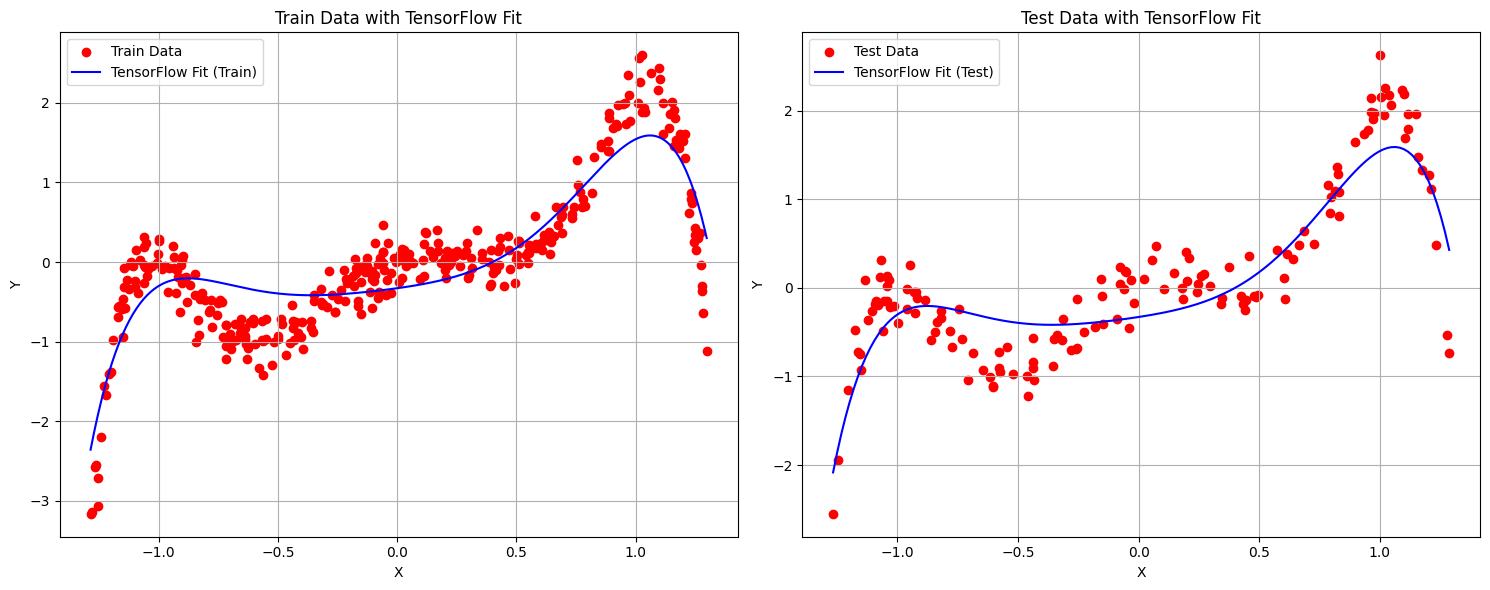

In [204]:
# Создаем новый холст с двумя осями
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Строим диаграмму рассеяния для тренировочной выборки на левой оси
axs[0].scatter(x_tf_train, y_tf_train, color='red', label='Train Data')

# Строим линию полинома для тренировочной выборки на левой оси
axs[0].plot(x_line_train, y_line_train, color='blue', label='TensorFlow Fit (Train)')

axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title('Train Data with TensorFlow Fit')
axs[0].legend()
axs[0].grid(True)

# Строим диаграмму рассеяния для тестовой выборки на правой оси
axs[1].scatter(x_tf_test, y_tf_test, color='red', label='Test Data')

# Строим линию полинома для тестовой выборки на правой оси
axs[1].plot(x_line_test, y_line_test, color='blue', label='TensorFlow Fit (Test)')

axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title('Test Data with TensorFlow Fit')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Оценка модели регрессии

In [205]:
df_student_performance = pd.read_csv('/content/drive/MyDrive/Student_Performance.csv')
df_student_performance.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [206]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [207]:
# Замена текстовых данных на числовые
label_encoders = {}
for column in df_student_performance.columns:
    if df_student_performance[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df_student_performance[column] = label_encoders[column].fit_transform(df_student_performance[column])

# Удаление строк с отсутствующими значениями (null значениями)
df_student_performance.dropna(inplace=True)

# Удаление дубликатов
df_student_performance.drop_duplicates(inplace=True)

df_student_performance

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [208]:
from sklearn.preprocessing import StandardScaler

x = df_student_performance[["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]].to_numpy()
y = df_student_performance["Performance Index"].to_numpy()

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()


x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.3, shuffle = False)

In [209]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6911, 5)
(6911,)
(2962, 5)
(2962,)


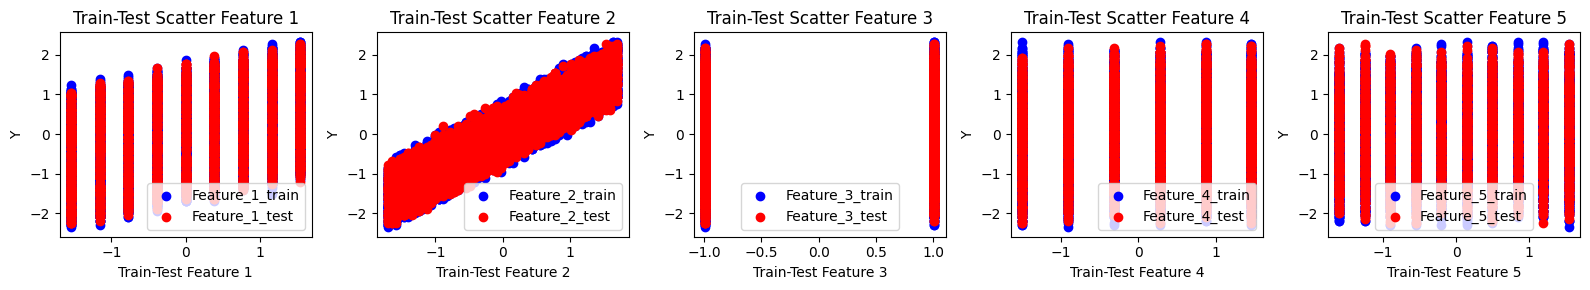

In [210]:
fig, axes = plt.subplots(1, 5, figsize=(16, 3))

for i, ax in enumerate(axes.flatten()):
    ax.scatter(x_train[:, i], y_train, label=f'Feature_{i+1}_train', color='blue')
    ax.scatter(x_test[:, i], y_test, label=f'Feature_{i+1}_test', color = 'red')
    ax.set_title(f'Train-Test Scatter Feature {i+1}')
    ax.set_xlabel(f'Train-Test Feature {i+1}')
    ax.set_ylabel('Y')
    ax.legend()

plt.tight_layout()
plt.show()

In [211]:
from sklearn.linear_model import SGDRegressor

SGDRegressor_reg = SGDRegressor(penalty='elasticnet', l1_ratio=0.5, learning_rate='adaptive', eta0=0.01, max_iter=1000, tol=1e-3)
SGDRegressor_reg.fit(x_train, y_train)

print('Коэффициенты регрессии:', SGDRegressor_reg.coef_)
print('Свободный член:', SGDRegressor_reg.intercept_)
print()

r2_SGDRegressor_reg_train, mae_SGDRegressor_reg_train, mape_SGDRegressor_reg_train, r2_SGDRegressor_reg_test, mae_SGDRegressor_reg_test, mape_SGDRegressor_reg_test = metrics(SGDRegressor_reg)

Коэффициенты регрессии: [0.38470221 0.91839715 0.01684293 0.04184326 0.02902878]
Свободный член: [-0.00093833]

обучающая:
R^2: 0.9887625493872612
MAE: 0.0840707578343714
MAPE: 0.3181992841901689

тестовая:
R^2: 0.9884851513059124
MAE: 0.08549417835853833
MAPE: 0.3423925576034805


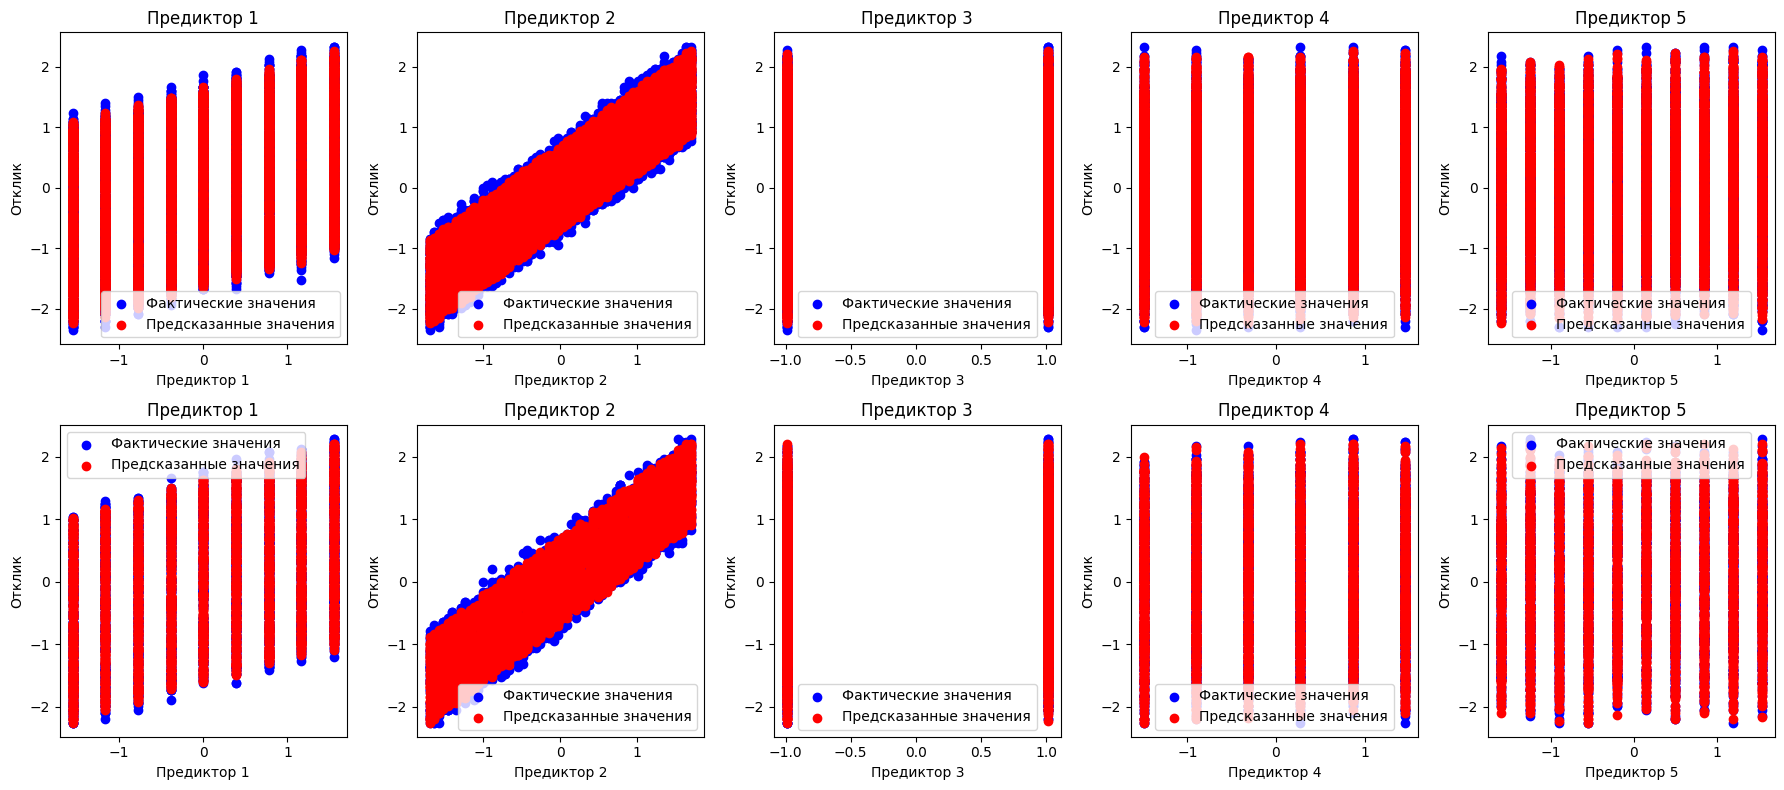

In [212]:
y_pred_train = SGDRegressor_reg.predict(x_train)
y_pred_test = SGDRegressor_reg.predict(x_test)

fig, axs = plt.subplots(2, 5, figsize=(18, 8))

# Графики для тренировочной выборки
for i in range(x_train.shape[1]):
    axs[0, i].scatter(x_train[:, i], y_train, color='blue', label='Фактические значения')
    axs[0, i].scatter(x_train[:, i], y_pred_train, color='red', label='Предсказанные значения')
    axs[0, i].set_xlabel(f'Предиктор {i+1}')
    axs[0, i].set_ylabel('Отклик')
    axs[0, i].set_title(f'Предиктор {i+1}')
    axs[0, i].legend()

# Графики для тестовой выборки
for i in range(x_test.shape[1]):
    axs[1, i].scatter(x_test[:, i], y_test, color='blue', label='Фактические значения')
    axs[1, i].scatter(x_test[:, i], y_pred_test, color='red', label='Предсказанные значения')
    axs[1, i].set_xlabel(f'Предиктор {i+1}')
    axs[1, i].set_ylabel('Отклик')
    axs[1, i].set_title(f'Предиктор {i+1}')
    axs[1, i].legend()

plt.tight_layout()
plt.show()